Training custom Word2Vec model...
Custom model trained and saved!

Exploring word relationships using vector arithmetic:
king - man + woman = [('judgment', 0.3133801817893982)]
Paris - France + Italy = [('They', 0.334911048412323)]
walking - walk + run = [('plaintiff', 0.23328393697738647)]


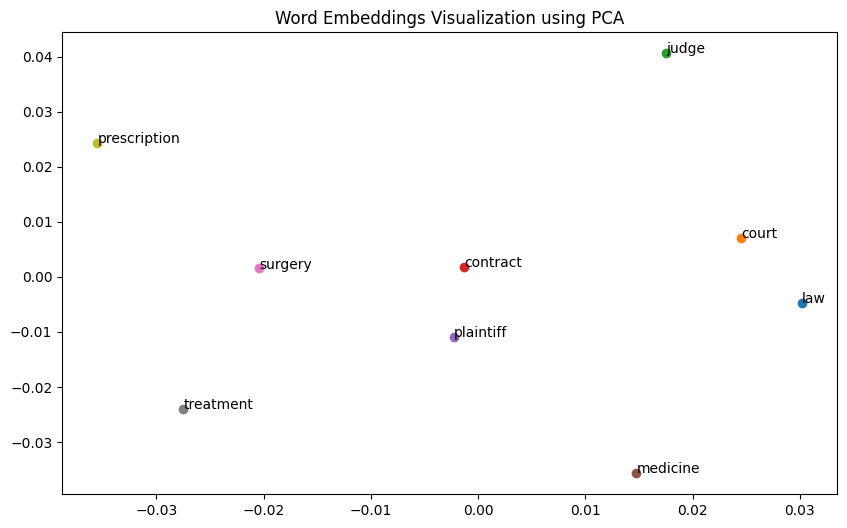

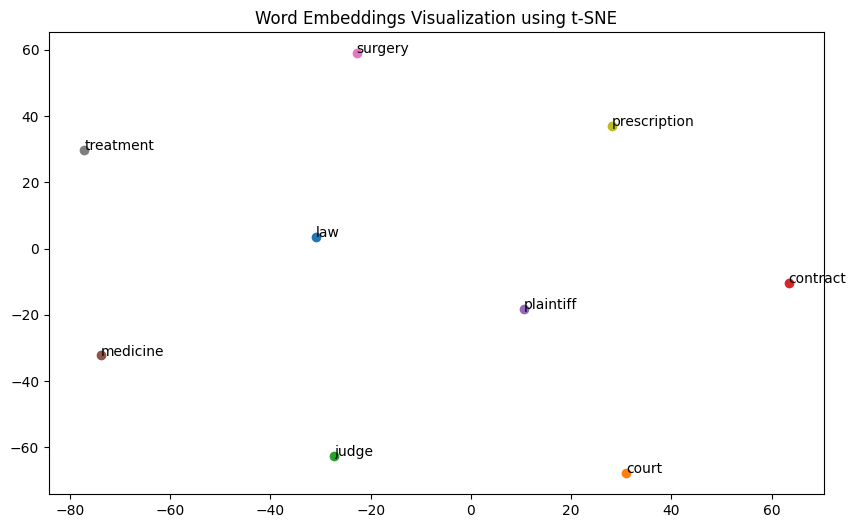

Top 5 words similar to 'law': ['hydration,', 'king', 'protects', 'large', 'prevent']
Original Prompt: Explain the impact of law on society
Enriched Prompt: Explain the Rome checkup treatment impact of walked city issued law hydration, king protects on doctor prescription pneumonia society
Generated Story:
Once upon a time, there was a adventure who discovered she hidden in a monitored. It led them on an adventure where they encountered inside and solved mysteries with routine before finding reviewed. And so, the journey of discovery continued...


In [8]:
import gensim
import gensim.downloader as api
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

def train_custom_word2vec(corpus_file, vector_size=100, window=5, min_count=1, workers=4):
    print("Training custom Word2Vec model...")
    sentences = LineSentence(corpus_file)
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    model.save("custom_word2vec.model")
    print("Custom model trained and saved!")
    return model

def load_pretrained_word_vectors():
    print("Loading pre-trained word vectors...")
    model = api.load("word2vec-google-news-300")  
    print("Model loaded successfully!")
    return model

def vector_arithmetic(model):
    print("\nExploring word relationships using vector arithmetic:")
    result = model.wv.most_similar(positive=["ruled", "woman"], negative=["man"], topn=1)
    print("king - man + woman =", result)
    result = model.wv.most_similar(positive=["Paris", "Italy"], negative=["France"], topn=1)
    print("Paris - France + Italy =", result)
    result = model.wv.most_similar(positive=["walking", "run"], negative=["walk"], topn=1)
    print("walking - walk + run =", result)

def visualize_embeddings(model, words, method='PCA'):
    valid_words = [word for word in words if word in model.wv]
    vectors = np.array([model.wv[word] for word in valid_words])
    if vectors.shape[0] == 0:
        print("No words found in the model vocabulary!")
        return
    elif vectors.shape[0] == 1:
        print(f"Only one word found: {valid_words}. Cannot visualize.")
        return
    
    if method == 'PCA':
        reducer = PCA(n_components=2)
    else:
        perplexity = min(30, vectors.shape[0] - 1)
        reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    
    reduced_vectors = reducer.fit_transform(vectors)
    
    plt.figure(figsize=(10, 6))
    for i, word in enumerate(valid_words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title(f"Word Embeddings Visualization using {method}")
    plt.show()

def find_similar_words(model, word, topn=5):
    if word in model.wv:
        return [w[0] for w in model.wv.most_similar(word, topn=topn)]
    else:
        return "Word not in vocabulary"

def enrich_prompt(model, prompt):
    words = prompt.split()
    enriched_words = []
    for word in words:
        if word in model.wv:
            similar_words = find_similar_words(model, word, topn=3)
            enriched_words.append(word)
            enriched_words.extend(similar_words)
        else:
            enriched_words.append(word)
    return " ".join(enriched_words)

def generate_creative_text(model, seed_word):
    similar_words = find_similar_words(model, seed_word, topn=5)
    if isinstance(similar_words, str):
        print(similar_words)
        return
    
    story = f"Once upon a time, there was a {seed_word} who discovered {similar_words[0]} hidden in a {similar_words[1]}. "
    story += f"It led them on an adventure where they encountered {similar_words[2]} and solved mysteries with {similar_words[3]} before finding {similar_words[4]}. "
    story += "And so, the journey of discovery continued..."
    
    print("Generated Story:")
    print(story)

def main():
    corpus_file = "corpus.txt" 
    custom_model = train_custom_word2vec(corpus_file)
    vector_arithmetic(custom_model)
    domain_words = ["law", "court", "judge", "contract", "plaintiff", "medicine", "diagnosis", "surgery", "treatment", "prescription"]
    visualize_embeddings(custom_model, domain_words, method='PCA')
    visualize_embeddings(custom_model, domain_words, method='t-SNE')
    word = "law"
    similar_words = find_similar_words(custom_model, word)
    print(f"Top 5 words similar to '{word}':", similar_words)
    original_prompt = "Explain the impact of law on society"
    enriched_prompt = enrich_prompt(custom_model, original_prompt)
    print("Original Prompt:", original_prompt)
    print("Enriched Prompt:", enriched_prompt)
    seed_word = "adventure"
    generate_creative_text(custom_model, seed_word)

if __name__ == "__main__":
    main()